# Pandas topics

In [1]:
import pandas as pd

In [2]:
marketing_data = pd.read_csv("..\data\Marketing_Raw_Data.csv", header=0)

In [3]:
marketing_data["Date"] = marketing_data["Date"].apply(pd.to_datetime, dayfirst=True)

In [4]:
marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             182 non-null    datetime64[ns]
 1   Day_Name         182 non-null    object        
 2   Visitors         182 non-null    int64         
 3   Revenue          182 non-null    int64         
 4   Marketing Spend  182 non-null    float64       
 5   Promo            182 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.7+ KB


# Dates in Pandas

In [5]:
marketing_data["Year"] = marketing_data["Date"].dt.year
marketing_data["Month"] = marketing_data["Date"].dt.month_name()

# Groupby and plotting

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: xlabel='Days of the week', ylabel='Average visitors'>

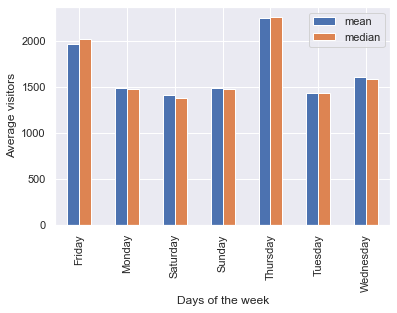

In [35]:
sns.set()
mean_visitors = marketing_data.groupby(["Day_Name"])["Visitors"].agg(['mean', 'median'])

fig, ax = plt.subplots()

mean_visitors.plot(kind='bar', ax=ax, xlabel="Days of the week", 
                   ylabel="Average visitors")

<AxesSubplot: xlabel='Days of the week', ylabel='Average visitors'>

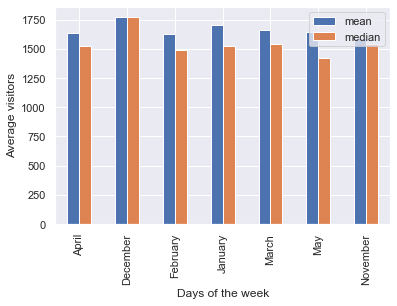

In [36]:
sns.set()
mean_visitors = marketing_data.groupby(["Month"])["Visitors"].agg(['mean', 'median'])

fig, ax = plt.subplots()

mean_visitors.plot(kind='bar', ax=ax, xlabel="Days of the week", 
                   ylabel="Average visitors")

<AxesSubplot: xlabel='Month', ylabel='Visitors'>

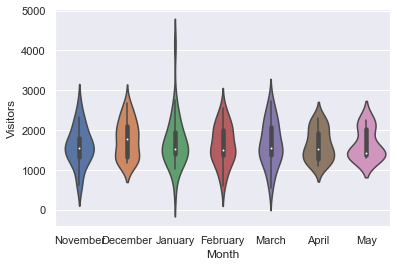

In [38]:
fig, ax = plt.subplots()

sns.violinplot(data=marketing_data, x="Month", y="Visitors"
               , ax=ax)

# Pivot tables 

In [7]:
marketing_data.columns

Index(['Date', 'Day_Name', 'Visitors', 'Revenue', 'Marketing Spend', 'Promo',
       'Year', 'Month'],
      dtype='object')

In [8]:
pivot_table = marketing_data.pivot_table(index=["Month", "Year"], aggfunc={"Revenue":"mean", "Visitors":"sum"})

In [9]:
marketing_data.pivot_table(index=["Day_Name"], aggfunc={"Revenue":"mean", "Visitors":"sum"})

,Revenue,Visitors
Day_Name,,
Friday,17223.961538,51179
Monday,10387.692308,38778
Saturday,10968.115385,36661
Sunday,11017.615385,38832
Thursday,18897.038462,58572
Tuesday,10046.384615,37336
Wednesday,12402.076923,41987


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '(April, 2021)'),
  Text(1, 0, '(December, 2020)'),
  Text(2, 0, '(February, 2021)'),
  Text(3, 0, '(January, 2021)'),
  Text(4, 0, '(March, 2021)'),
  Text(5, 0, '(May, 2021)'),
  Text(6, 0, '(November, 2020)')])

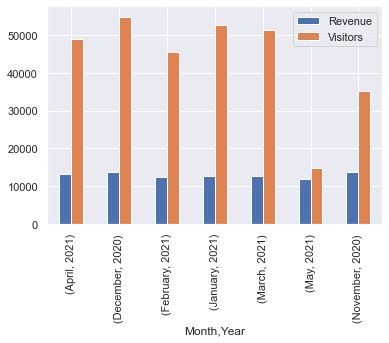

In [53]:
fig, ax = plt.subplots()

pivot_table.plot(kind='bar', ax=ax)
plt.xticks(rotation=90)